# Project in Data Analysis
## Dataset "Superstore"

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import seaborn as sns

#%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib.pyplot'

In [4]:
%matplotlib inline

AttributeError: module 'matplotlib' has no attribute 'interactive'

### Loading data

In [5]:
data_original = pd.read_excel('Sample - Superstore.xls')
data_original.head()

NameError: name 'pd' is not defined

How many trials are in this dataset?

In [19]:
print('Number of rows: ',data_original.shape[0],'\nNumber of columns: ',data_original.shape[1])

Number of rows:  9994 
Number of columns:  21


In [20]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
Row ID           9994 non-null int64
Order ID         9994 non-null object
Order Date       9994 non-null datetime64[ns]
Ship Date        9994 non-null datetime64[ns]
Ship Mode        9994 non-null object
Customer ID      9994 non-null object
Customer Name    9994 non-null object
Segment          9994 non-null object
Country          9994 non-null object
City             9994 non-null object
State            9994 non-null object
Postal Code      9994 non-null int64
Region           9994 non-null object
Product ID       9994 non-null object
Category         9994 non-null object
Sub-Category     9994 non-null object
Product Name     9994 non-null object
Sales            9994 non-null float64
Quantity         9994 non-null int64
Discount         9994 non-null float64
Profit           9994 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(3), object(13)
memory usage: 1.6+ 

To check if there are any missing values in the entire data set

In [21]:
data_original.isnull().values.any()

False

Which of the columns are not important? Can we remove some?

In [22]:
data_original['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [23]:
data_truncated = data_original.drop(['Country', 'Postal Code', 'Region'], axis = 1)
data_truncated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [24]:
data_truncated.State.value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

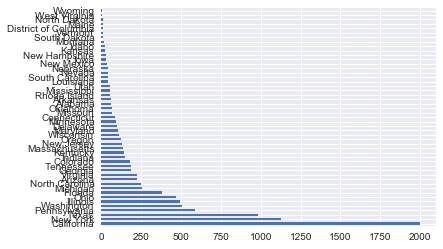

In [25]:
data_truncated.State.value_counts().plot.barh()

In [26]:
data_truncated['Order Date in Year'] = data_truncated['Order Date'].dt.strftime('%Y')
data_truncated['Order Date in Year']

0       2016
1       2016
2       2016
3       2015
4       2015
5       2014
6       2014
7       2014
8       2014
9       2014
10      2014
11      2014
12      2017
13      2016
14      2015
15      2015
16      2014
17      2014
18      2014
19      2014
20      2014
21      2016
22      2016
23      2017
24      2015
25      2016
26      2016
27      2015
28      2015
29      2015
        ... 
9964    2016
9965    2016
9966    2016
9967    2017
9968    2017
9969    2017
9970    2015
9971    2015
9972    2016
9973    2016
9974    2016
9975    2016
9976    2016
9977    2016
9978    2016
9979    2016
9980    2015
9981    2017
9982    2016
9983    2016
9984    2015
9985    2015
9986    2016
9987    2017
9988    2017
9989    2014
9990    2017
9991    2017
9992    2017
9993    2017
Name: Order Date in Year, dtype: object

In [75]:
dt_1 = data_truncated.groupby(['Order Date in Year', 'Product Name', 'Quantity']).size().unstack()
dt_1

Quantity                                                                1   \
Order Date in Year Product Name                                              
2014               #10 White Business Envelopes,4 1/8 x 9 1/2          NaN   
                   #10- 4 1/8" x 9 1/2" Recycled Envelopes             NaN   
                   #10- 4 1/8" x 9 1/2" Security-Tint Envelopes        1.0   
                   1.7 Cubic Foot Compact "Cube" Office Refrigerators  1.0   
                   1/4 Fold Party Design Invitations & White Envel...  1.0   
                   12 Colored Short Pencils                            NaN   
                   12-1/2 Diameter Round Wall Clock                    NaN   
                   2300 Heavy-Duty Transfer File Systems by Perma      NaN   
                   24 Capacity Maxi Data Binder Racks, Pearl           NaN   
                   24-Hour Round Wall Clock                            NaN   
                   3-ring staple pack                                  NaN   
                   3.6 Cubic Foot Counter Height Office Refrigerator   NaN   
                   3D Systems Cube Printer, 2nd Generation, White      NaN   
                   3M Hangers With Command Adhesive                    NaN   
                   3M Organizer Strips                                 NaN   
                   3M Polarizing Task Lamp with Clamp Arm, Light Gray  NaN   
                   4009 Highlighters by Sanford                        NaN   
                   50 Colored Long Pencils                             NaN   
                   9-3/4 Diameter Round Wall Clock                     NaN   
                   ACCOHIDE 3-Ring Binder, Blue, 1"                    NaN   
                   ACCOHIDE Binder by Acco                             NaN   
                   APC 7 Outlet Network SurgeArrest Surge Protector    NaN   
                   ARKON Windshield Dashboard Air Vent Car Mount H...  NaN   
                   AT&T 1070 Corded Phone                              NaN   
                   AT&T 1080 Corded phone                              NaN   
                   AT&T 17929 Lendline Telephone                       NaN   
                   AT&T 841000 Phone                                   NaN   
                   AT&T CL2909                                         NaN   
                   AT&T CL82213                                        1.0   
                   AT&T EL51110 DECT                                   NaN   
...                                                                    ...   
2017               Xerox 214                                           1.0   
                   Xerox 215                                           NaN   
                   Xerox 216                                           NaN   
                   Xerox 217                                           2.0   
                   Xerox 218                                           2.0   
                   Xerox 219                                           NaN   
                   Xerox 22                                            NaN   
                   Xerox 220                                           NaN   
                   Xerox 221                                           NaN   
                   Xerox 222                                           NaN   
                   Xerox 225                                           NaN   
                   Xerox 226                                           NaN   
                   Xerox 227                                           1.0   
                   Xerox 228                                           NaN   
                   Xerox 23                                            NaN   
                   Xerox 230                                           NaN   
                   Xerox 231                                           NaN   
                   Xerox 4200 Series MultiUse Premium Copy Paper (...  1.0   
                   Xer

In [90]:
Year = np.unique(pd.Series(data_truncated['Order Date in Year']))
Year

array(['2014', '2015', '2016', '2017'], dtype=object)

KeyError: 'Quantity'

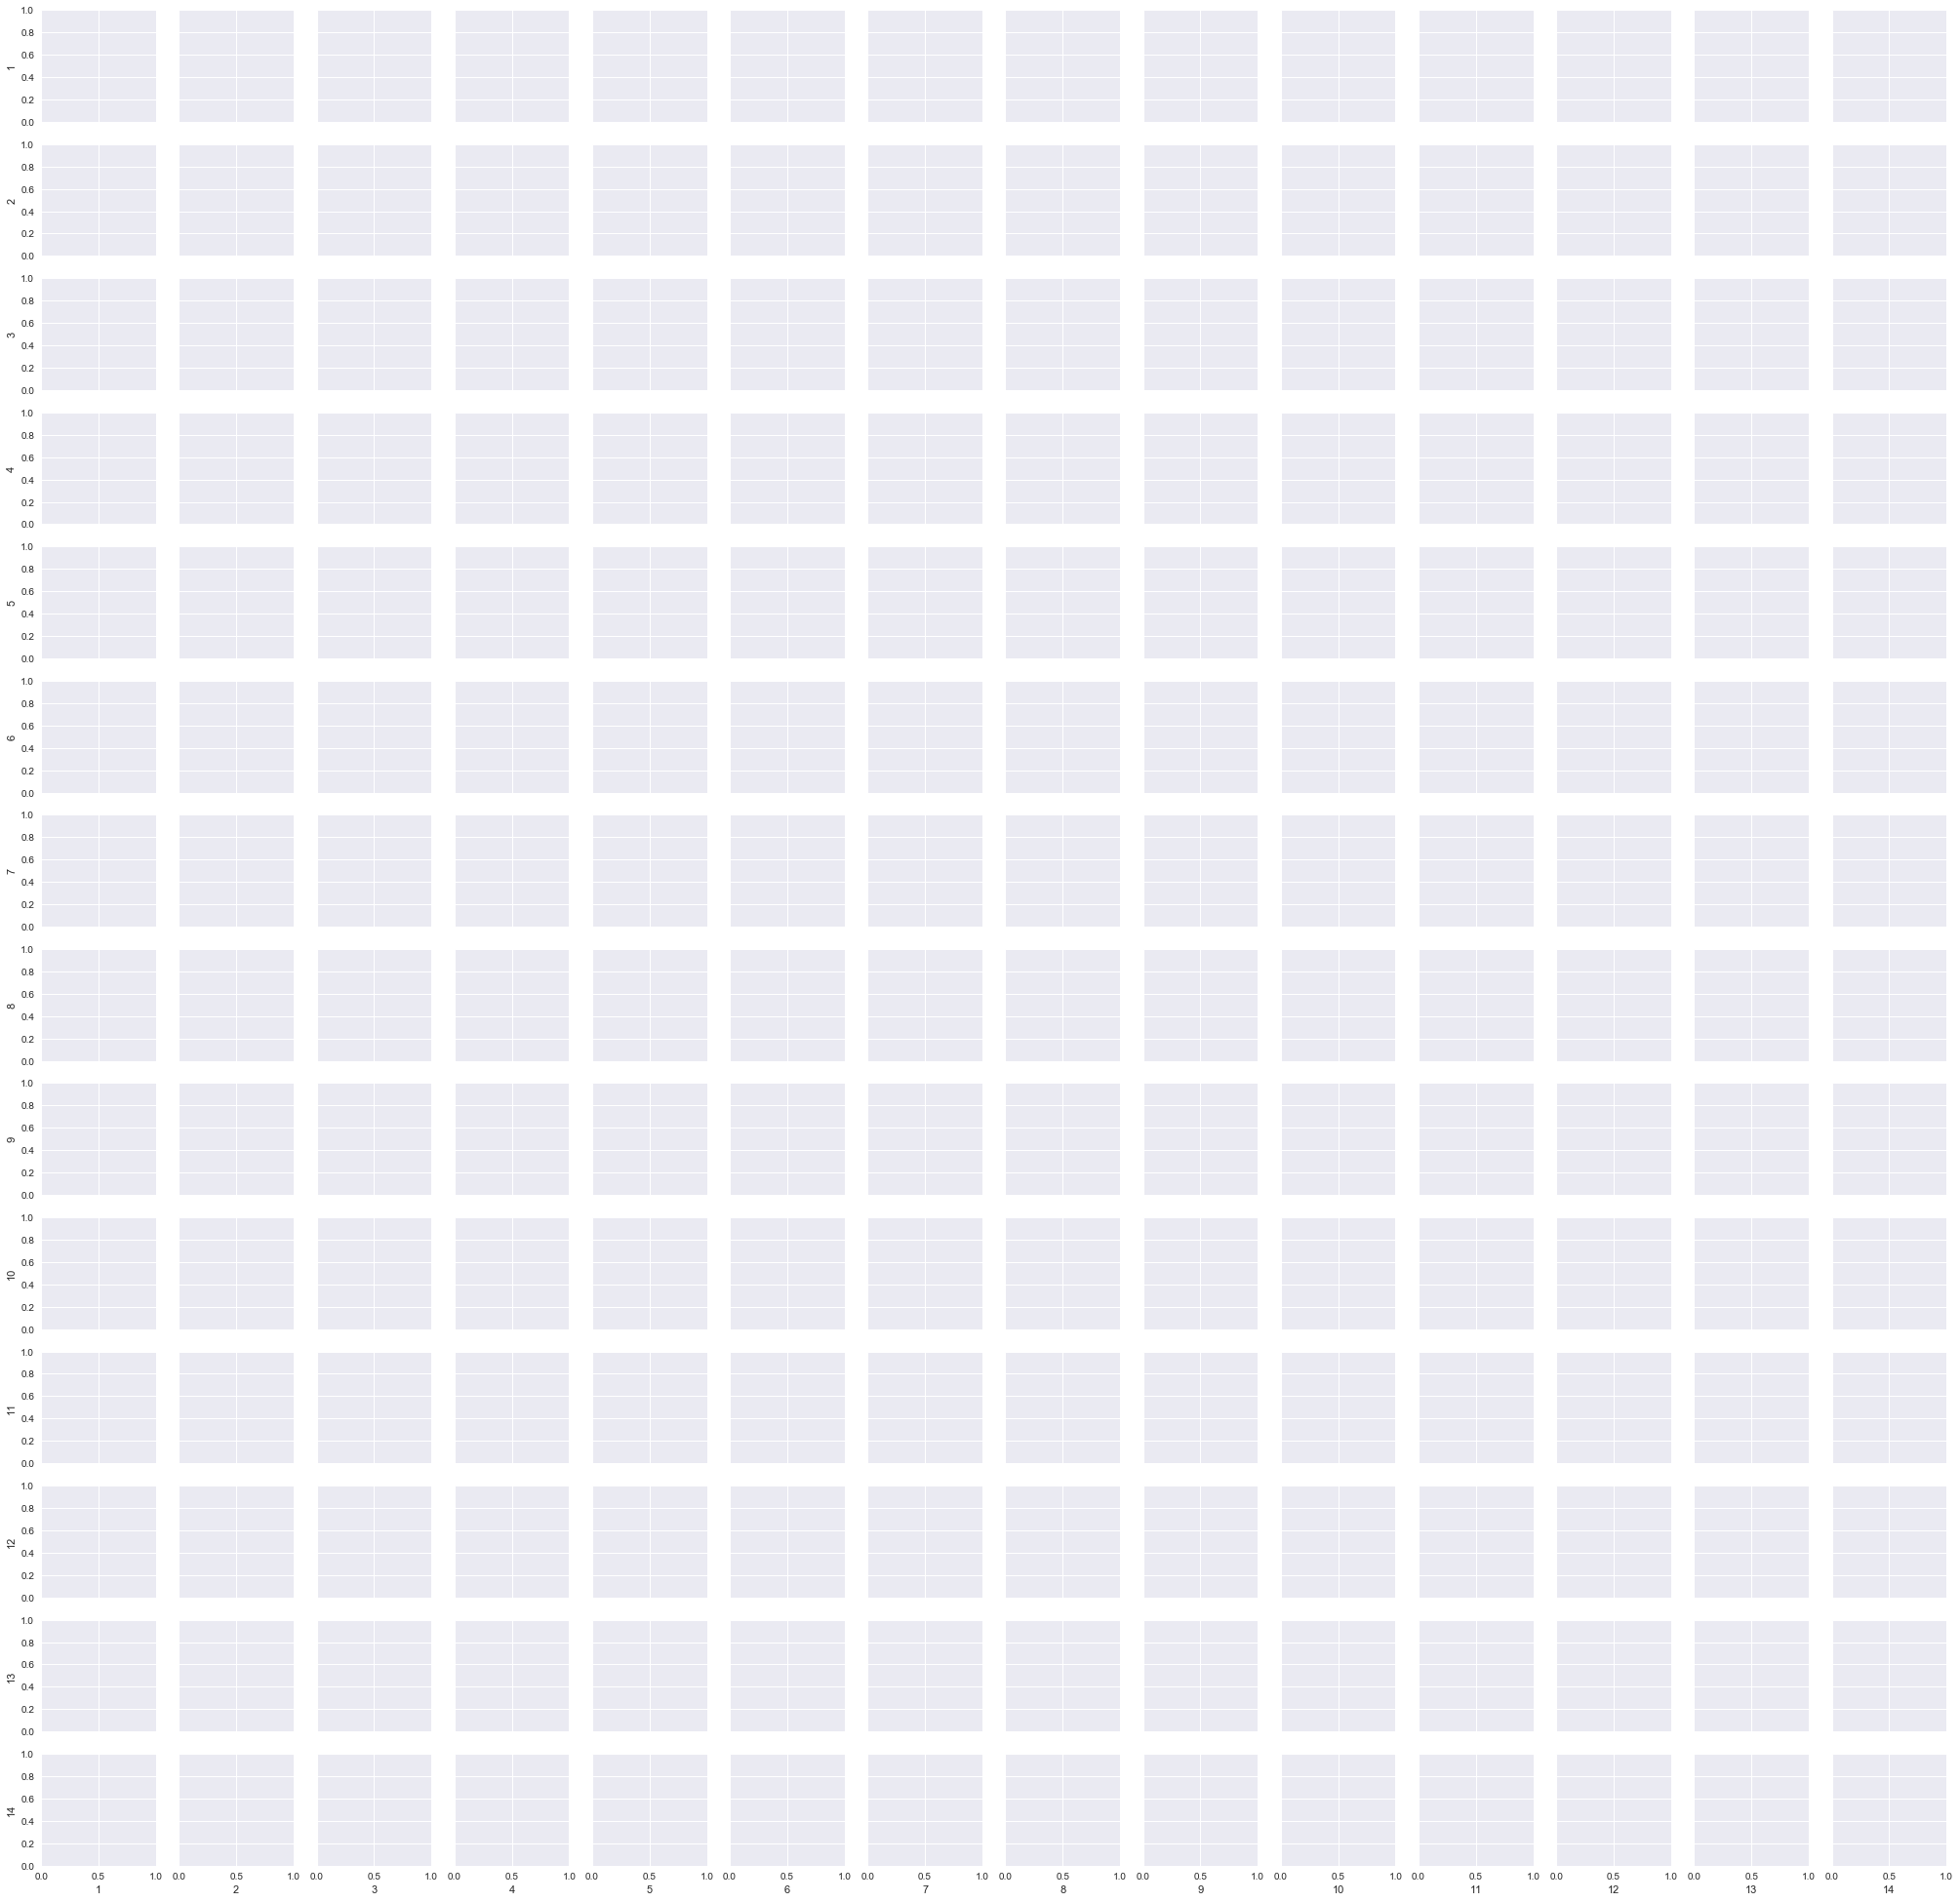

In [123]:
sns.pairplot(hue = 'Quantity', data = dt_1)

In [140]:
dt_1.plot(kind = 'bar', x = np.unique(pd.Series(data_truncated['Order Date in Year'])), y= 'Quantity' )

ValueError: Length mismatch: Expected axis has 5327 elements, new values have 4 elements

In [152]:
sns.catplot(x='Order Date in Year', y='Quantity', 
            data=data_truncated,jitter='0.25')

AttributeError: module 'seaborn' has no attribute 'catplot'

In [155]:
sns_data = sns.load_dataset('Sample - Superstore.xls')
#x = np.unique(pd.Series(data_truncated['Order Date in Year'])).T
y = pd.Series(data_truncated['Sales']).T
ax = sns.regplot(x=x, y=y, color="g")

HTTPError: HTTP Error 400: Bad Request

In [16]:
data_truncated['Sales per unit'] = data_truncated['Sales'] / data_truncated['Quantity']
data_truncated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales per unit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840


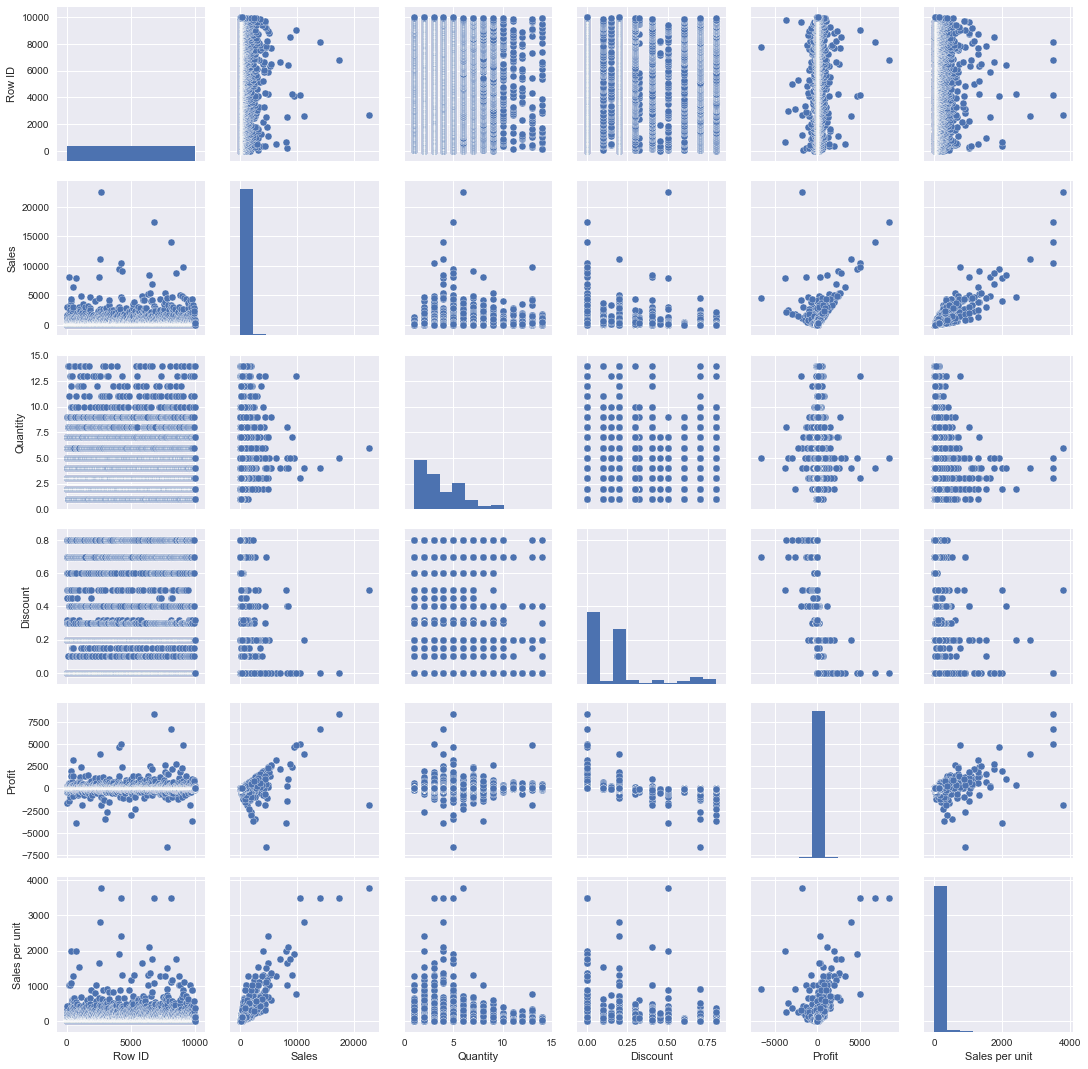

In [17]:
import seaborn as sns
sns.pairplot(data_truncated, );

In [42]:
data_truncated['Days of transport'] = data_truncated['Ship Date'].subtract(data_truncated['Order Date'])
data_truncated.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Date in Year,Days of transport
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,3 days
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,3 days
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,4 days
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,7 days
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,7 days


In [43]:
Columns = ['Row ID', 'Order ID','Order Date','Ship Date','Days of transport','Ship Mode','Customer ID','Customer Name','Segment','City','State','Product ID','Category','Sub-Category','Product Name','Sales per unit', 'Sales','Quantity','Discount','Profit']
for i in Columns:
    print(f'The unique elements for the column {i} is {np.unique(data_truncated[i])}\n')


The unique elements for the column Row ID is [   1    2    3 ... 9992 9993 9994]

The unique elements for the column Order ID is ['CA-2014-100006' 'CA-2014-100090' 'CA-2014-100293' ... 'US-2017-169488'
 'US-2017-169502' 'US-2017-169551']

The unique elements for the column Order Date is ['2014-01-03T00:00:00.000000000' '2014-01-04T00:00:00.000000000'
 '2014-01-05T00:00:00.000000000' ... '2017-12-28T00:00:00.000000000'
 '2017-12-29T00:00:00.000000000' '2017-12-30T00:00:00.000000000']

The unique elements for the column Ship Date is ['2014-01-07T00:00:00.000000000' '2014-01-08T00:00:00.000000000'
 '2014-01-10T00:00:00.000000000' ... '2018-01-03T00:00:00.000000000'
 '2018-01-04T00:00:00.000000000' '2018-01-05T00:00:00.000000000']

The unique elements for the column Days of transport is [              0  86400000000000 172800000000000 259200000000000
 345600000000000 432000000000000 518400000000000 604800000000000]

The unique elements for the column Ship Mode is ['First Class' 'Same Day' 

KeyError: 'Sales per unit'

In [ ]:
for i in Columns:
    print(f'''The statistics for the column {i} are:
          {data_truncated[i].describe()}\n\n''')

In [ ]:
data_truncated.loc[data_truncated['Sales'].idxmax()]

In [ ]:
data_truncated.loc[data_truncated['Profit'].idxmax()]

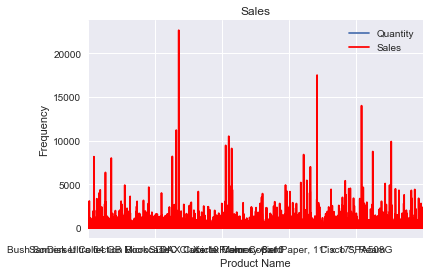

In [39]:
ax = plt.gca()
plot_1 = data_truncated.plot(kind='line', x='Product Name', y= 'Quantity', ax=ax)

plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.title("Sales")

plot_2 = data_truncated.plot(kind='line', x='Product Name', y= 'Sales', color='red', ax=ax)

plt.show()



In [40]:
#Group by the products by each state
Prod_sales = data_truncated.groupby(['State', 'Product Name']) 
  
# Print the first value in each group 
Prod_sales.first()


Row ID  \
State     Product Name                                                 
Alabama   1.7 Cubic Foot Compact "Cube" Office Refrigerators      80   
          14-7/8 x 11 Blue Bar Computer Printout Paper          4922   
          AT&T 17929 Lendline Telephone                         4925   
          Acme Stainless Steel Office Snips                     1433   
          Acrylic Self-Standing Desk Frames                     6255   
          Ampad Phone Message Book, Recycled, 400 Message...    1270   
          Anker Astro Mini 3000mAh Ultra-Compact Portable...    3818   
          Anker Ultrathin Bluetooth Wireless Keyboard Alu...    8554   
          Assorted Color Push Pins                              4923   
          Avaya IP Phone 1140E VoIP phone                       1977   
          Avery 499                                             9670   
          Avery Heavy-Duty EZD  Binder With Locking Rings         81   
          Avery Heavy-Duty EZD View Binder with Locking R...    3704   
          Avery Poly Binder Pockets                             2835   
          Bevis Round Conference Table Top, X-Base              6825   
          Boston Model 1800 Electric Pencil Sharpener, Gray     9490   
          Bretford CR8500 Series Meeting Room Furniture         3817   
          Brother DCP1000 Digital 3 in 1 Multifunction Ma...    3705   
          Canvas Sectional Post Binders                         1432   
          Colored Envelopes                                     6924   
          Compact Automatic Electric Letter Opener              2740   
          Dot Matrix Printer Tape Reel Labels, White, 500...    6923   
          Easy-staple paper                                     1452   
          Enermax Acrylux Wireless Keyboard                     8339   
          Global Manager's Adjustable Task Chair, Storm         3819   
          Global Wood Trimmed Manager's Task Chair, Khaki       1978   
          Gould Plastics 18-Pocket Panel Bin, 34w x 5-1/4...    1976   
          HP Standard 104 key PS/2 Keyboard                     2187   
          Hewlett-Packard Deskjet 3050a All-in-One Color ...    1455   
          High-Back Leather Manager's Chair                     1434   
...                                                              ...   
Wisconsin O'Sullivan Living Dimensions 2-Shelf Bookcases        3763   
          Office Star - Mesh Screen back chair with Vinyl...    9285   
          Office Star - Professional Matrix Back Chair wi...    1792   
          Office Star Flex Back Scooter Chair with Alumin...    9894   
          Permanent Self-Adhesive File Folder Labels for ...    7988   
          Pizazz Global Quick File                              7990   
          Plantronics CS510 - Over-the-Head monaural Wire...    9514   
          Plantronics Cordless Phone Headset with In-line...     148   
          Plastic Binding Combs                                 6852   
          Portable Personal File Box                            4832   
          Prestige Round Ring Binders                           5079   
          Rosewill 107 Normal Keys USB Wired Standard Key...    5280   
          Rush Hierlooms Collection 1" Thick Stackable Bo...    3995   
          Samsung Galaxy S III - 16GB - pebble blue (T-Mo...    1789   
          Sauder Camden County Collection Libraries, Plan...    5731   
          Speediset Carbonless Redi-Letter 7" x 8 1/2"          9891   
          Stur-D-Stor Shelving, Vertical 5-Shelf: 72"H x ...      17   
          Surelock Post Binders                                 3006   
          Tensor Track Tree Floor Lamp                          8932   
          VTech DS6151                                          7261   
          Westinghouse Clip-On Gooseneck Lamps                  8934   
          Wilson Jones Easy Flow II Sheet Lifters               6683   
          X-Rack File for Hanging Folders                       4833   
          Xerox 191           

In [ ]:
Prod_sales = data_truncated.groupby(['Quantity', 'Product Name']) 
  
# Print the first value in each group 
Prod_sales.first()

In [ ]:
Product_name_largest_value = data_truncated.groupby('Product Name')['Quantity'].apply(lambda grp: grp.nlargest(10))
Product_name_largest_value

In [ ]:
# Which state had sold the most:
State_with_quantity = data_truncated.groupby(['State']).sum().sort_values('Quantity', ascending=False)
State_with_quantity

In [ ]:
State_with_the_most_quantity = State_with_quantity.head(10)
State_with_the_most_quantity

In [ ]:
State_with_the_least_quantity = State_with_quantity.tail(10)
State_with_the_least_quantity

In [ ]:
# In California were sold the most units, but did it keep the highest amount in sales?
State_with_sales = data_truncated.groupby('State').sum().sort_values('Sales', ascending=False)
State_with_sales

In [ ]:
State_with_the_most_sales = State_with_sales.head(10)
State_with_the_most_sales

In [ ]:
State_with_the_least_sales = State_with_sales.tail(10)
State_with_the_least_sales

In [ ]:
# Which state had the highest profit:
State_with_profit = data_truncated.groupby(['State']).sum().sort_values('Profit', ascending=False)
State_with_profit

In [ ]:
State_with_highest_profit = State_with_profit.head(10)
State_with_highest_profit

In [ ]:
State_with_lowest_profit = State_with_profit.tail(10)
State_with_lowest_profit

In [ ]:
# Which customer had bought the most:
Customer_quantity = data_truncated.groupby(['Customer Name']).sum().sort_values('Quantity', ascending=False)
Customer_quantity

In [ ]:
Customer_with_the_most_quantity = Customer_quantity.head(10)
Customer_with_the_most_quantity

In [ ]:
Customer_with_the_least_quantity = Customer_quantity.tail(10)
Customer_with_the_least_quantity

In [ ]:
Customer_sales = data_truncated.groupby(['Customer Name']).sum().sort_values('Sales', ascending=False)
Customer_sales

In [ ]:
Customer_with_the_most_sales = Customer_sales.head(10)
Customer_with_the_most_sales

In [ ]:
Customer_with_the_least_sales = Customer_sales.tail(10)
Customer_with_the_least_sales

In [ ]:
Customer_profit = data_truncated.groupby(['Customer Name']).sum().sort_values('Profit', ascending=False)
Customer_profit

In [ ]:
Customer_with_the_most_profit = Customer_profit.head(10)
Customer_with_the_most_profit

In [ ]:
Customer_with_the_lowest_profit = Customer_profit.tail(10)
Customer_with_the_lowest_profit

In [ ]:
Customer_quantity['Sales'].plot()
Customer_quantity['Profit'].plot()
plt.legend()
Customer_with_the_most_sales.plot.pie(x = 'Customer Name', y = 'Sales')

In [ ]:
# For which segment there was the most sales:
# Are  3 types of segments: Consumer, Corporate and Home Office
Segment_quantity = data_truncated.groupby(['Segment']).sum().sort_values('Sales', ascending=False)
Segment_quantity

In [ ]:
print('The profit raport between Corporate and Consumer in %  is: ', Segment_quantity['Profit']['Corporate']/Segment_quantity['Profit']['Consumer']*100, '%')
print('The profit raport between Home Office and Consumer in %  is: ', Segment_quantity['Profit']['Home Office']/Segment_quantity['Profit']['Consumer']*100, '%')

In [ ]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Quantity')

In [ ]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Sales')

In [ ]:
Segment_quantity.plot.pie(x = 'Segment', y = 'Profit')

In [ ]:
# What item was sold the most?
Product_quantity = data_truncated.groupby(['Product Name']).sum().sort_values('Quantity', ascending=False)
Product_quantity

In [ ]:
Product_with_the_highest_quantity = Product_quantity.head(10)
Product_with_the_highest_quantity

In [ ]:
Product_with_the_lowest_quantity = Product_quantity.tail(10)
Product_with_the_lowest_quantity

In [ ]:
# Which product has the  highest amount in sales?
Product_sales = data_truncated.groupby(['Product Name']).sum().sort_values('Sales', ascending=False)
Product_sales

In [ ]:
Product_with_the_highest_sales = Product_sales.head(10)
Product_with_the_highest_sales

In [ ]:
Product_with_the_lowest_sales = Product_sales.tail(10)
Product_with_the_lowest_sales

In [ ]:
# For which product was the higher profit?
Product_profit = data_truncated.groupby(['Product Name']).sum().sort_values('Profit', ascending=False)
Product_profit

In [ ]:
Product_with_the_highest_profit = Product_profit.head(10)
Product_with_the_highest_profit

In [ ]:
Product_with_the_lowest_profit = Product_profit.tail(10)
Product_with_the_lowest_profit

In [ ]:
# Which customer in which state bought the most?
# We can see who sold the most within each state.

group_1 = data_truncated.groupby(['State','Customer Name']).sum()
total_sales = group_1['Sales'].groupby(level=0, group_keys=False)
total_sales.nlargest(5)

In [ ]:
#group_2 = data_truncated.groupby(['Days of transport','Sales'])
#total_sales_for_shipmode = group_2['Sales'].groupby(level=0, group_keys=False)
#data_truncated.groupby(['Days of transport', 'Product Name', 'Sales']).plot(x='Product Name', y= ['Days of transport','Sales'] ,figsize=(10,5), grid=True)

In [ ]:
# Change the order of columns
data_truncated = data_truncated[Columns]
data_truncated